In [1]:
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
# To reload local imported modules dynamically
%autoreload 2
plt.rcParams["figure.figsize"] = (20,10)

## Пример градиентного спуска с лекции

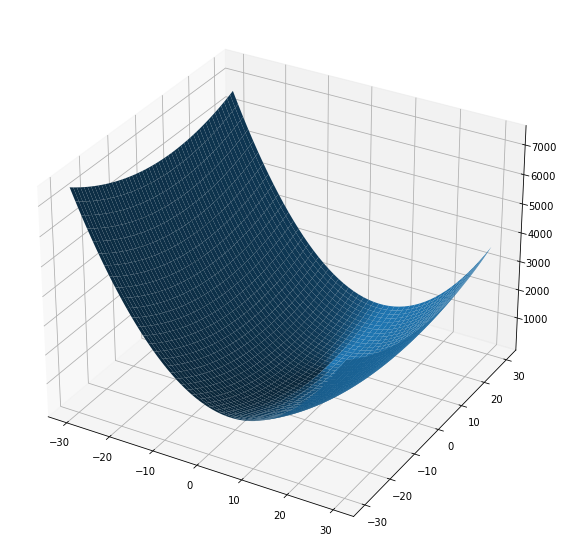

In [2]:
def f(x, y):
    return 5 * (x - 5) ** 2 + (y - 7) ** 2


def grad(x, y):
    return [10 * (x - 5), 2 * (y - 7)]


t = np.linspace(-30, 30, 1000)
X, Y = np.meshgrid(t, t)
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(X, Y, f(X, Y))

[[-20.         -20.        ]
 [ -5.         -16.76      ]
 [  1.         -13.9088    ]
 [  3.4        -11.399744  ]
 [  4.36        -9.19177472]
 [  4.744       -7.24876175]
 [  4.8976      -5.53891034]
 [  4.95904     -4.0342411 ]
 [  4.983616    -2.71013217]
 [  4.9934464   -1.54491631]
 [  4.99737856  -0.51952635]
 [  4.99895142   0.38281681]
 [  4.99958057   1.17687879]
 [  4.99983223   1.87565334]
 [  4.99993289   2.49057494]
 [  4.99997316   3.03170594]
 [  4.99998926   3.50790123]
 [  4.99999571   3.92695308]
 [  4.99999828   4.29571871]
 [  4.99999931   4.62023247]]


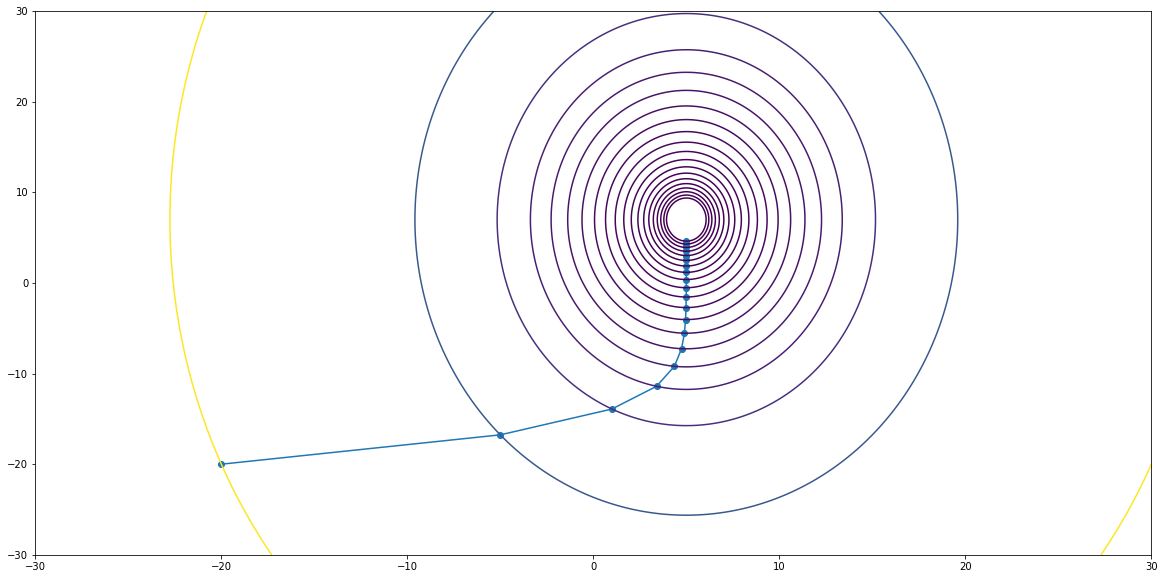

In [3]:
lr = 0.06
epoch = 20
x = [-20, -20]

points = np.zeros((epoch, 2))
points[0] = x
for i in range(1, epoch):
    x = x - lr * np.array(grad(x[0], x[1]))
    points[i] = x

print(points)
plt.plot(points[:, 0], points[:, 1], 'o-')
plt.contour(X, Y, f(X, Y), levels=sorted([f(p[0], p[1]) for p in points]))

## Экспоненциальный шаг градиентного спуска

[[-20.         -20.        ]
 [  5.         -14.6       ]
 [  5.         -10.32298472]
 [  5.          -6.92699139]
 [  5.          -4.22391407]
 [  5.          -2.06715045]
 [  5.          -0.34216239]
 [  5.           1.04075524]
 [  5.           2.15202784]
 [  5.           3.04707631]
 [  5.           3.76961635]
 [  5.           4.35421075]
 [  5.           4.82824842]
 [  5.           5.21348259]
 [  5.           5.52722914]
 [  5.           5.78330224]
 [  5.           5.99274653]
 [  5.           6.16441149]
 [  5.           6.30540282]
 [  5.           6.42143808]]


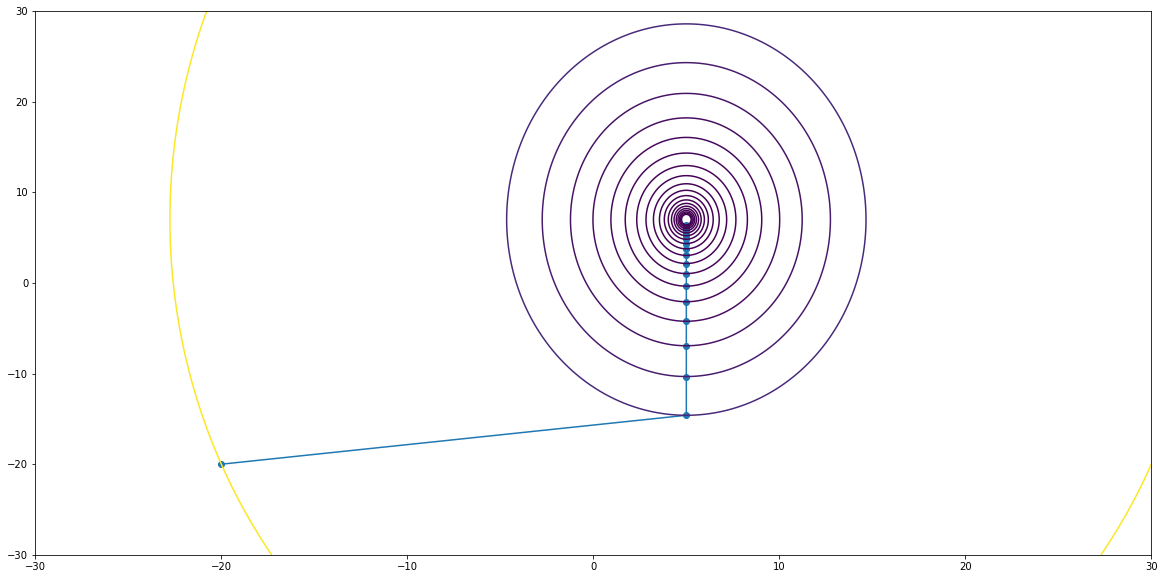

In [4]:
import optimization as opt

epoch = 20
x = [-20, -20]
lr = 0.1

points = np.zeros((epoch, 2))
points[0] = x
for i in range(1, epoch):
    x = x - lr * np.array(grad(x[0], x[1]))
    lr = opt.exp_decay(lr)
    points[i] = x

print(points)
plt.plot(points[:, 0], points[:, 1], 'o-')
plt.contour(X, Y, f(X, Y), levels=sorted([f(p[0], p[1]) for p in points]))

## Поиск минимума одномерной функции при помощи дихотомии

[-21.80783657  -8.78414266  -2.27229571   0.98362777   2.61158951
   1.79760864   1.3906182    1.18712299   1.08537538   1.03450157
   1.00906467   0.99634622   1.00270544   0.99952583   1.00111564
   1.00032073   0.99992328   1.00012201   1.00002265   0.99997296
   0.99999781]


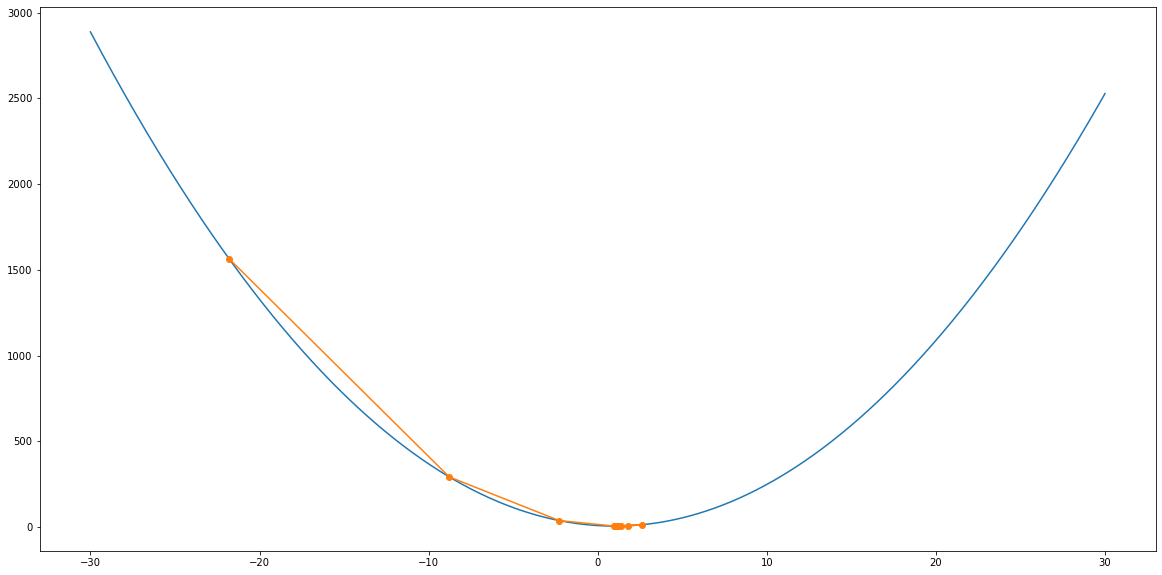

In [5]:
import optimization as opt

def f(x):
    return 3 * (x[0] - 1) ** 2 + 5

epoch = 20
x = [-100]

bounds = opt.find_unimodal_interval(f, x)
points = opt.dichotomy(f, bounds, max_iter=epoch, log=True)

print(points)
t = np.linspace(-30, 30, 1000)
plt.plot(t, f([t]))
plt.plot(points, f([points]) , 'o-')

## Градиентный спуск на основе дихотомии

[[0.5        0.5       ]
 [0.74912341 0.3670271 ]
 [0.83719919 0.38703204]
 [0.81921953 0.53119233]
 [0.92184623 0.53584307]
 [0.9218502  0.68361282]
 [1.04512578 0.69454729]
 [1.0325889  0.83813282]
 [1.1933503  0.85270445]
 [1.1695359  0.99414998]
 [1.37059279 1.02503013]
 [1.35103867 1.14306199]
 [2.35964832 1.65220316]
 [2.35441772 1.66030712]
 [2.34949547 1.66779086]
 [2.34488407 1.67465286]
 [2.34057944 1.68090317]
 [2.33657226 1.68656129]
 [2.3328493  1.69165406]
 [2.32939459 1.69621352]
 [2.32619052 1.7002751 ]]


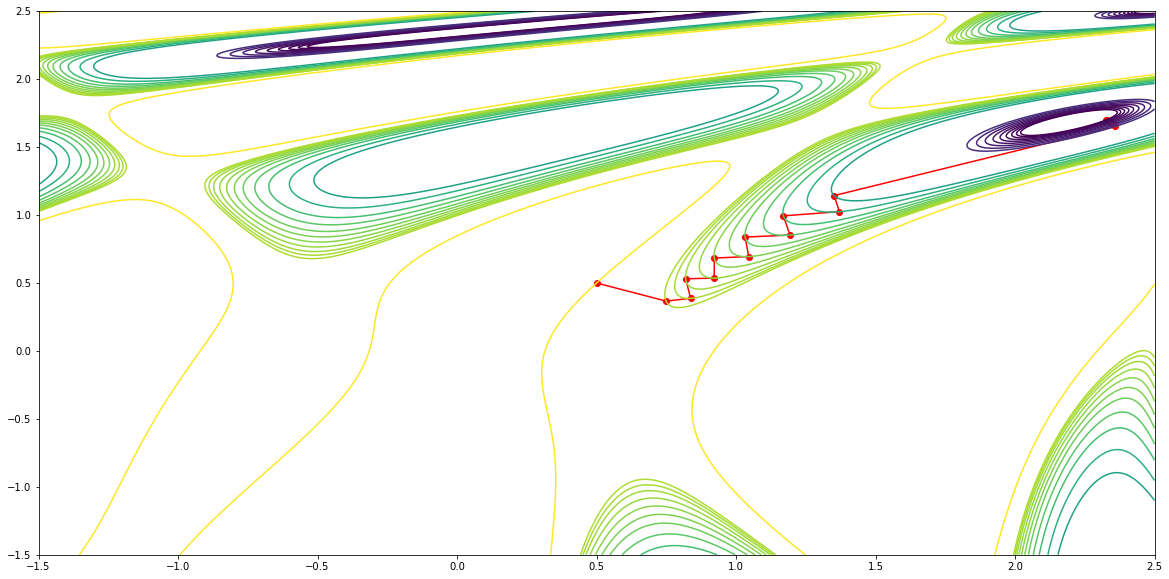

In [6]:
def f(x):
    return np.sin(0.5 * x[0]**2 - 0.25 * x[1]**2 + 3)*np.cos(2*x[0]+1-np.exp(x[1]))

epoch = 20
x = [0.5, 0.5]

points = opt.gradient_descent(
    x,
    lambda x: opt.min_in_direction(f, x, -opt.grad(f, x), "dichotomy"),
    lambda i, p: i >= epoch
)

print(points)
plt.plot(points[:, 0], points[:, 1], 'o-', color="red")
t = np.linspace(-1.5, 2.5, 1000)
X = np.meshgrid(t, t)
plt.contour(X[0], X[1], f(X), levels=sorted([f(p) for p in points]))

## Поиск минимума одномерной функции с помощью условий Вольфе

[[3.        ]
 [3.7983341 ]
 [4.02634043]
 [4.18175025]
 [4.29636003]
 [4.38341761]
 [4.4516349 ]
 [4.50499427]
 [4.54718812]
 [4.58055084]
 [4.60721996]
 [4.62851671]
 [4.64534316]
 [4.65879959]
 [4.66955815]
 [4.67815833]
 [4.68503239]
 [4.69052643]
 [4.69491729]
 [4.69842639]
 [4.70123076]]


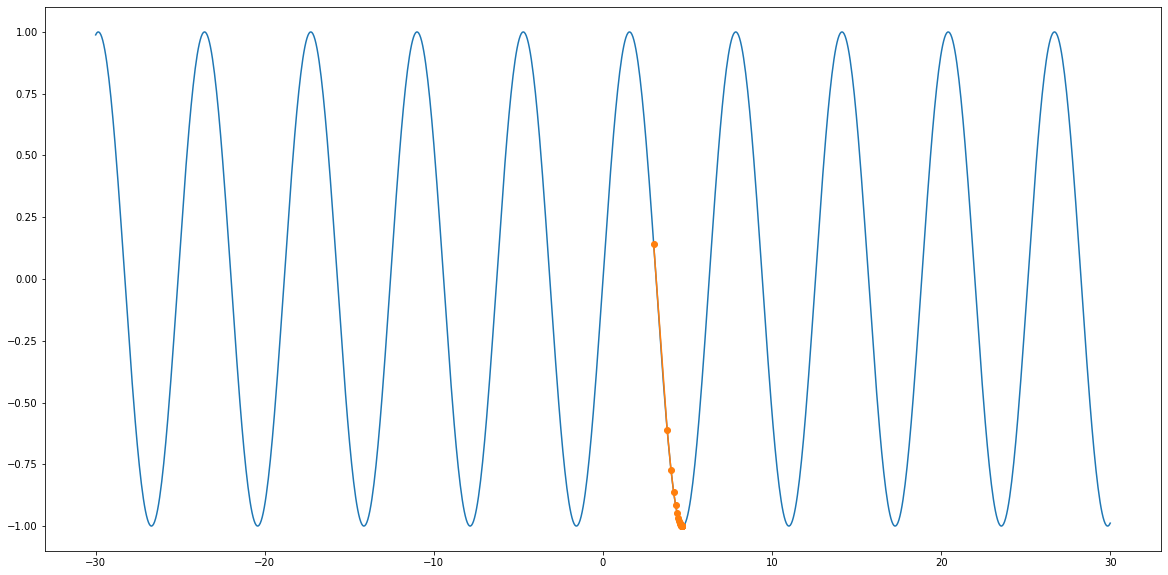

In [7]:
import optimization as opt

def f(x):
    return np.sin(x[0])

epoch = 20
x = [3]

points = opt.gradient_descent(
    x,
    lambda x: x - opt.wolfe_conditions(f, x, -opt.grad(f, x)) * opt.grad(f, x),
    lambda i, p: i >= epoch
)

print(points)
t = [np.linspace(-30, 30, 1000)]
plt.plot(t[0], f(t))
plt.plot(points, f([points]) , 'o-')

## Поиск минимума двумерной функции с помощью условий Вольфе

[[0.5        0.5       ]
 [0.63205429 0.42951429]
 [0.68181571 0.41335497]
 [0.71645105 0.40587446]
 [0.74336578 0.40309947]
 [0.76627338 0.40378981]
 [0.78852266 0.40834571]
 [0.81777033 0.42226906]
 [1.81892989 1.57002725]
 [1.83451451 1.55746242]
 [1.84901812 1.54839081]
 [1.86357752 1.54203766]
 [1.8804284  1.53822556]
 [1.90696103 1.5391548 ]
 [1.98840564 1.57561492]
 [2.0137469  1.59825282]
 [2.04651028 1.60753501]
 [2.06499268 1.62324439]
 [2.08879653 1.63004551]
 [2.1027378  1.64131545]
 [2.11935994 1.64595873]]


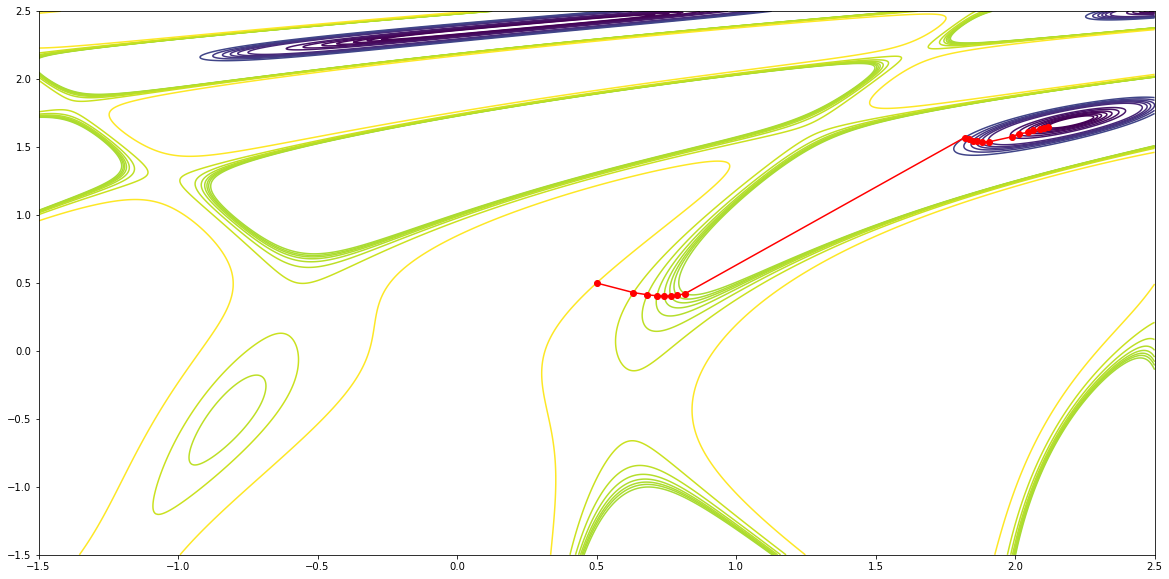

In [8]:
import optimization as opt

def f(x):
    return np.sin(0.5 * x[0]**2 - 0.25 * x[1]**2 + 3)*np.cos(2*x[0]+1-np.exp(x[1]))

epoch = 20
x = [0.5, 0.5]

points = opt.gradient_descent(
    x,
    lambda x: x - opt.wolfe_conditions(f, x, -opt.grad(f, x)) * opt.grad(f, x),
    lambda i, p: i >= epoch
)

print(points)
t = np.linspace(-1.5, 2.5, 1000)
X = np.meshgrid(t, t)
plt.contour(X[0], X[1], f(X), levels=sorted([f(p) for p in points]))
plt.plot(points[:, 0], points[:, 1], 'o-', color="red")

## Поиск минимума функции многих переменных с помощью условий Вольфе

[[-5.          5.          1.        ]
 [-3.39467688  4.03680613  1.9173275 ]
 [-2.132513    3.18936646  2.68148845]
 [-1.14611899  2.44617315  3.31516775]
 [-0.37999823  1.79655267  3.83820092]
 [ 0.2112701   1.23064099  4.26784941]
 [ 0.66918163  0.73441813  4.62259128]
 [ 1.01675099  0.30592992  4.91038116]
 [ 1.28136636 -0.06641796  5.14497474]
 [ 1.47867448 -0.38494865  5.3327794 ]
 [ 1.62616878 -0.6591085   5.48379635]
 [ 1.73407034 -0.89132712  5.60299277]
 [ 1.81316511 -1.08917694  5.69745743]
 [ 1.86985751 -1.25500275  5.77089924]
 [ 1.90974429 -1.39200123  5.82707207]
 [ 1.93796516 -1.50606551  5.87032852]
 [ 1.95755696 -1.59966193  5.90309072]
 [ 1.97109601 -1.67628504  5.92782145]
 [ 1.98040885 -1.73886547  5.94642615]
 [ 1.98678454 -1.78985524  5.9603741 ]
 [ 1.99108535 -1.83088862  5.9706907 ]]


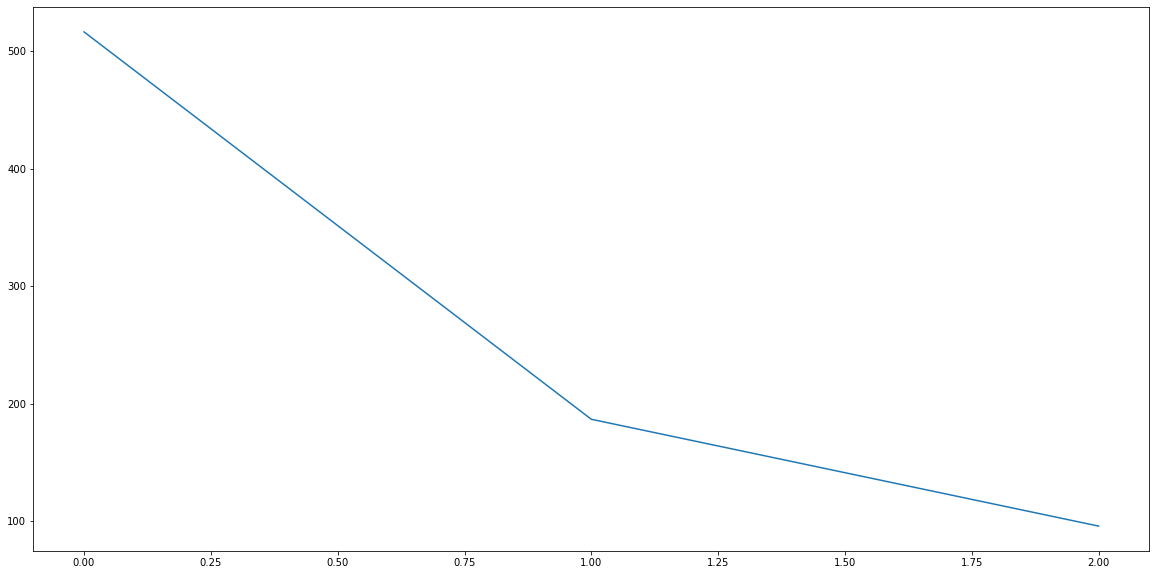

In [9]:
import optimization as opt

def f(x):
    return 5 * (x[0] - 2)**2 + 3 * (x[1] + 2) ** 2 + 4 * (x[2] - 6) ** 2 + 1

epoch = 20
x = [-5, 5, 1]

points = opt.gradient_descent(
    x,
    lambda x: x - opt.wolfe_conditions(f, x, -opt.grad(f, x)) * opt.grad(f, x),
    lambda i, p: i >= epoch
)

print(points)
plt.plot(f(points))

## Генерация случайной квадратичной функции от 2 переменных

[[ 2.00000000e+00 -3.00000000e+00]
 [ 1.48000000e+00 -1.84000000e+00]
 [ 1.11040000e+00 -1.11840000e+00]
 [ 8.43584000e-01 -6.71360000e-01]
 [ 6.48012800e-01 -3.95927040e-01]
 [ 5.02573158e-01 -2.27472794e-01]
 [ 3.92959615e-01 -1.25479662e-01]
 [ 3.09348506e-01 -6.45885988e-02]
 [ 2.44895260e-01 -2.89627630e-02]
 [ 1.94757698e-01 -8.74035791e-03]
 [ 1.55456544e-01  2.19647885e-03]]


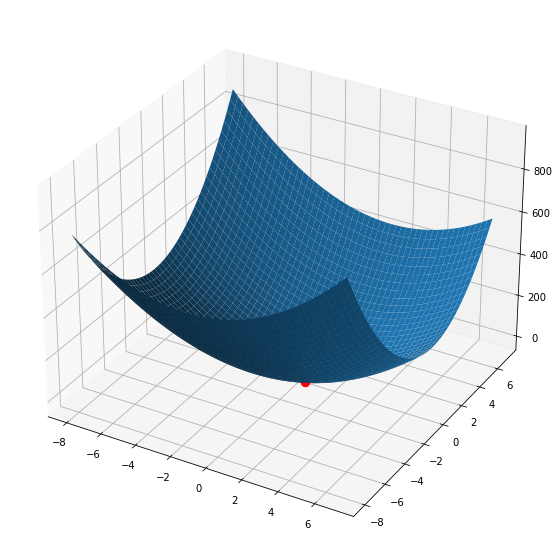

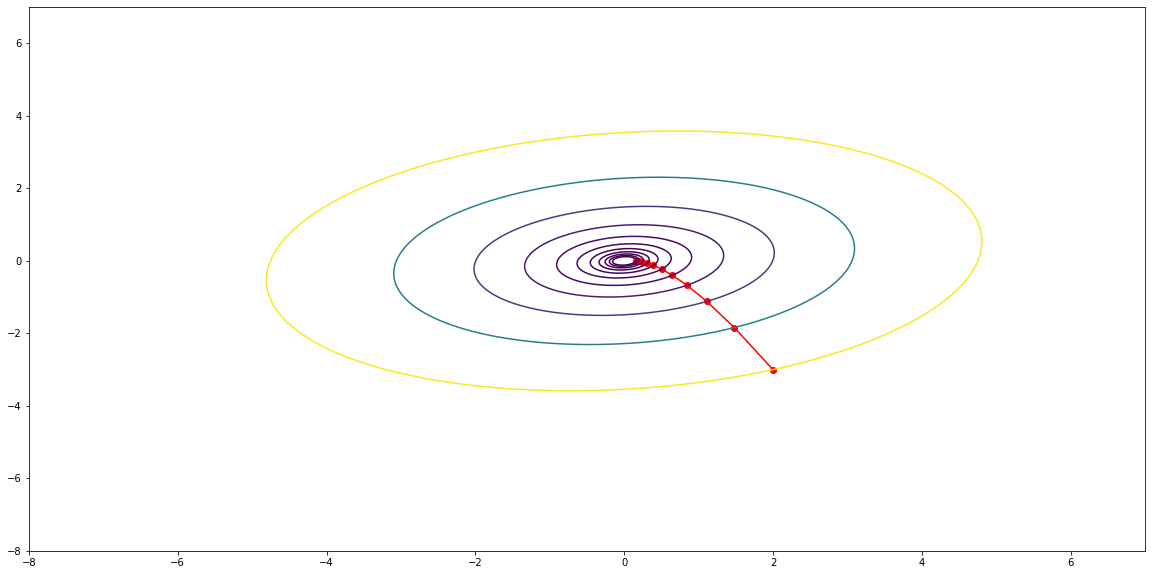

In [10]:
import optimization as opt
f = opt.gen_quadratic_function(2, 10)

epoch = 10
x = [2, -3]

points = opt.gradient_descent(
    x,
    lambda x: x - 0.02 * opt.grad(f, x),
    lambda iteration, p: iteration >= epoch
)


print(points)
t = np.linspace(min(*points[:, 0], *points[:, 1]) - 5, max(*points[:, 0], *points[:, 1]) + 5, 1000)
X = np.meshgrid(t, t)
ax1 = plt.figure().add_subplot(projection='3d')
ax1.plot_surface(X[0], X[1], f(X))
ax1.scatter(points[0][0], points[0][1], f(points[0]), color='red', linewidths=5)
ax2 = plt.figure().add_subplot()
ax2.plot(points[:, 0], points[:, 1], 'o-', color="red")
ax2.contour(X[0], X[1], f(X), levels=sorted([f(p) for p in points]))